In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Realisasi_2020.xlsx')

In [3]:
df.head()

Unnamed: 0 Akun Analisis  \
0           0           NaN   
1           3       41. PAD   
2           4       41. PAD   
3           5       41. PAD   
4           6       41. PAD   

                                        Namakegiatan  \
0  perhitungan fihak ketiga badan pengelolaan keu...   
1                                                non   
2                                                non   
3                                                non   
4                                                non   

                                  Namakegiatan_stem  Kodepemda   standarpemda  \
0  hitung fihak tiga badan kelola uang pajak daerah      13.37  Kota Surabaya   
1                                               non       1.00  Provinsi Aceh   
2                                               non       1.00  Provinsi Aceh   
3                                               non       1.00  Provinsi Aceh   
4                                               non       1.00  Provinsi Aceh   

   Tahun  nilaianggaran  
0   2020   2.221547e+11  
1   2020   1.477991e+12  
2   2020   8.159970e+09  
3   2020   1.817008e+11  
4   2020   9.029240e+11

In [4]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
from nltk.tokenize import word_tokenize 
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(word_tokenize)
df.head()

Unnamed: 0 Akun Analisis  \
0           0           NaN   
1           3       41. PAD   
2           4       41. PAD   
3           5       41. PAD   
4           6       41. PAD   

                                        Namakegiatan  \
0  perhitungan fihak ketiga badan pengelolaan keu...   
1                                                non   
2                                                non   
3                                                non   
4                                                non   

                                   Namakegiatan_stem  Kodepemda  \
0  [hitung, fihak, tiga, badan, kelola, uang, paj...      13.37   
1                                              [non]       1.00   
2                                              [non]       1.00   
3                                              [non]       1.00   
4                                              [non]       1.00   

    standarpemda  Tahun  nilaianggaran  
0  Kota Surabaya   2020   2.221547e+11  
1  Provinsi Aceh   2020   1.477991e+12  
2  Provinsi Aceh   2020   8.159970e+09  
3  Provinsi Aceh   2020   1.817008e+11  
4  Provinsi Aceh   2020   9.029240e+11

In [5]:
buang = ['tingkat', 'layan', 'ada', 'bina', 'rencana', 'selenggara', 'kembang', 'susun', 'bangun', 'sedia', 'jasa', 'bantu', 'pelihara', 'rutin', 'kelola',
         'laksana', 'evaluasi', 'monitoring', 'operasional', 'lapor', 'kantor', 'kerja', 'fasilitas', 'perintah', 'alat', 'drpd', 'rancang', 'atur', 'bimbing',
         'teknis', 'rkpd', 'tulis', 'tenaga', 'milik', 'daerah', 'dinas', 'rehabilitasi', 'berat', 'sistem', 'informasi', 'komunikasi', 'makan', 'minum', 'sumber',
         'daya', 'non' ,'instalasi', 'listrik', 'fisik', 'terang', 'langsung', 'ganda', 'barang', 'cetak', 'kendala', 'kala', 'masyarakat', 'rapat', 'sosialisasi',
         'konsultasi', 'informasi', 'tata', 'lingkung', 'pimpin', 'anggota', 'hasil', 'temu', 'awas', 'internal', 'tindak', 'arsip', 'administrasi', 'koordinasi',
         'dapat', 'lengkap', 'kualitas', 'data', 'surat', 'manfaat', 'rapat', 'rapatrapat', 'pustaka', 'dprd', 'gedung', 'batas', 'wilayah', 'komponen', 'kelompok',
         'skpd', 'jabat', 'rumah', 'verifikasi', 'intensifikasi', 'ekstentifikasi', 'belanja', 'kendara', 'motor', 'tambah', 'lurah', 'daerah', 'angkut', 'jalan',
         'terima', 'biaya', 'kendali', 'desa', 'kota', 'bidang', 'hidup', 'camat', 'kabupaten', 'uang', 'paripurna', 'uji', 'bijak', 'pemuda', 'tetap', 'pusat',
         'sinkronisasi', 'bahan', 'baca', 'perundangundangan', 'naik', 'pangkat', 'ekstensifikasi', 'duduk', 'dukung', 'disiplin', 'operasi', 'latih', 'bahaya', 'bekal',
         'khusus', 'harihari', 'hari', 'reformasi', 'birokrasi', 'potensi']

# Pada Nama Kegiatan
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(lambda x: [i for i in x if i not in buang])

In [6]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["Namakegiatan_stem"] = df["Namakegiatan_stem"].apply(join_text_list)

In [7]:
import multiprocessing
from gensim.models import Word2Vec

In [8]:
cores = multiprocessing.cpu_count()

In [9]:
w2v_model = Word2Vec(min_count=10,
                     window=2,
                     vector_size=15,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     workers=cores-1)

In [10]:
import numpy as np
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [11]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)

In [12]:
w2v_model.build_vocab(df['Namakegiatan_stem'], progress_per=10000)
w2v_model.train(df['Namakegiatan_stem'], total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
w2v_model.init_sims(replace=True)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_15156/991895892.py:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [13]:
vectorized_docs = vectorize(df['Namakegiatan_stem'], model=w2v_model)

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
true_k = 50
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(vectorized_docs)
labels=model.labels_
results=pd.DataFrame(list(zip(df['Akun Analisis'],
                              df['Namakegiatan'],
                              df['Namakegiatan_stem'],
                              df['Kodepemda'],
                              df['standarpemda'],
                              df['Tahun'],
                              df['nilaianggaran'],
                              labels)),columns=['Akun Analisis','Nama Kegiatan','Nama Kegiatan_stem',
                                                'Kode Pemda', 'Standar Pemda', 'Tahun', 'Nilai Anggaran', 'Cluster'])
print(results.sort_values(by=['Cluster']))

                  Akun Analisis  \
476033        53. Belanja Modal   
432383        53. Belanja Modal   
201379  52. Belanja Barang Jasa   
432382        53. Belanja Modal   
201377  52. Belanja Barang Jasa   
...                         ...   
352483  52. Belanja Barang Jasa   
138416  52. Belanja Barang Jasa   
214531  52. Belanja Barang Jasa   
150372  52. Belanja Barang Jasa   
240246  52. Belanja Barang Jasa   

                                            Nama Kegiatan  \
476033     bantuan operasional sekolah bos sdn 2 panggung   
432383  pembangunan ruang perpustakaan beserta perabot...   
201379             pelayanan pengaduan emergency call 112   
432382  pembangunan ruang perpustakaan beserta perabot...   
201377  pelayanan penerbitan identitas resmi anak kia ...   
...                                                   ...   
352483           pemeliharaan jalan lingkungan permukiman   
138416  pembangunan pemberdayaan masyarakat kelurahan ...   
214531                        

In [16]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(vectorized_docs, model.labels_, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

In [17]:
results.head()

Akun Analisis                                      Nama Kegiatan  \
0           NaN  perhitungan fihak ketiga badan pengelolaan keu...   
1       41. PAD                                                non   
2       41. PAD                                                non   
3       41. PAD                                                non   
4       41. PAD                                                non   

              Nama Kegiatan_stem  Kode Pemda  Standar Pemda  Tahun  \
0  hitung fihak tiga badan pajak       13.37  Kota Surabaya   2020   
1                                       1.00  Provinsi Aceh   2020   
2                                       1.00  Provinsi Aceh   2020   
3                                       1.00  Provinsi Aceh   2020   
4                                       1.00  Provinsi Aceh   2020   

   Nilai Anggaran  Cluster  
0    2.221547e+11       24  
1    1.477991e+12        1  
2    8.159970e+09        1  
3    1.817008e+11        1  
4    9.029240e+11        1

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 14400x5040 with 0 Axes>

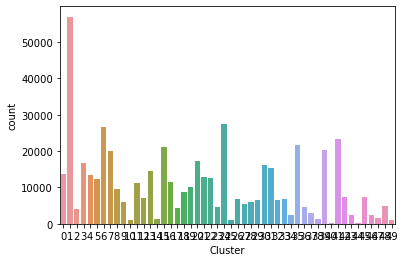

<Figure size 14400x5040 with 0 Axes>

In [18]:
import seaborn as sns
sns.countplot('Cluster', data = results)
plt.figure(figsize=(200,70)) 

In [19]:
results.loc[results['Nama Kegiatan_stem'] == '']

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  \
1                                  41. PAD           non                      
2                                  41. PAD           non                      
3                                  41. PAD           non                      
4                                  41. PAD           non                      
5                                  41. PAD           non                      
...                                    ...           ...                ...   
519159  66. Pengeluaran Pembiayaan Lainnya           non                      
519160  66. Pengeluaran Pembiayaan Lainnya           non                      
519161  66. Pengeluaran Pembiayaan Lainnya           non                      
519162  66. Pengeluaran Pembiayaan Lainnya           non                      
519163  66. Pengeluaran Pembiayaan Lainnya           non                      

        Kode Pemda     Standar Pemda  Tahun  Nilai Anggaran  Cluster  
1             1.00     Provinsi Aceh   2020    1.477991e+12        1  
2             1.00     Provinsi Aceh   2020    8.159970e+09        1  
3             1.00     Provinsi Aceh   2020    1.817008e+11        1  
4             1.00     Provinsi Aceh   2020    9.029240e+11        1  
5             1.01   Kab. Aceh Barat   2020    2.116968e+10        1  
...            ...               ...    ...             ...      ...  
519159       24.21  Kab. Sabu Raijua   2020    4.518883e+09        1  
519160       24.22       Kab. Malaka   2020    1.008976e+10        1  
519161       26.00    Provinsi Papua   2020    8.733509e+10        1  
519162       26.01  Kab. Biak Numfor   2020    9.357000e+08        1  
519163       26.12       Kab. Keerom   2020    3.498267e+06        1  

[56926 rows x 8 columns]

In [20]:
results['Nama Kegiatan_stem'] = results['Nama Kegiatan_stem'].replace([''], 'kosong')

In [36]:
results.loc[results['Cluster'] == 15][:200]

Akun Analisis                                      Nama Kegiatan  \
516                41. PAD                                        nonkegiatan   
517                41. PAD                                        nonkegiatan   
518                41. PAD                                        nonkegiatan   
519                41. PAD                                        nonkegiatan   
832                41. PAD  biaya penunjang operasional penyelenggaraan pe...   
...                    ...                                                ...   
10485  51. Belanja Pegawai  pendataan standar minimal harga tanah kabupate...   
10505  51. Belanja Pegawai                    penyelenggaraan musrenbang rkpd   
10527  51. Belanja Pegawai  penyusunan perbup draft qanun penanggulangan k...   
10585  51. Belanja Pegawai  evaluasi dokumen perencanaan penganggaran dana...   
10618  51. Belanja Pegawai  kontak tani nelayan andalan ktna kabupaten ace...   

                                    Nama Kegiatan_stem  Kode Pemda  \
516                                        nonkegiatan        8.00   
517                                        nonkegiatan        8.00   
518                                        nonkegiatan        8.00   
519                                        nonkegiatan        8.00   
832         tunjang didik bpopp tulungagung trenggalek       13.00   
...                                                ...         ...   
10485           standar minimal harga tanah nagan raya        1.19   
10505                                       musrenbang        1.19   
10527  perbup draft qanun tanggulang miskin nagan raya        1.19   
10585                      dokumen anggar dana kampung        1.20   
10618      kontak tani nelayan andal ktna aceh tamiang        1.20   

             Standar Pemda  Tahun  Nilai Anggaran  Cluster  Label  
516      Provinsi  Lampung   2020    2.386345e+12       15     15  
517      Provinsi  Lampung   2020    1.708021e+10       15     15  
518      Provinsi  Lampung   2020    2.987363e+10       15     15  
519      Provinsi  Lampung   2020    4.089874e+11       15     15  
832    Provinsi Jawa Timur   2020    2.638508e+11       15     15  
...                    ...    ...             ...      ...    ...  
10485      Kab. Nagan Raya   2020    1.264000e+07       15     15  
10505      Kab. Nagan Raya   2020    8.000000e+06       15     15  
10527      Kab. Nagan Raya   2020    2.992000e+06       15     15  
10585    Kab. Aceh Tamiang   2020    6.100000e+06       15     15  
10618    Kab. Aceh Tamiang   2020    8.800000e+07       15     15  

[200 rows x 9 columns]

Cluster: 0


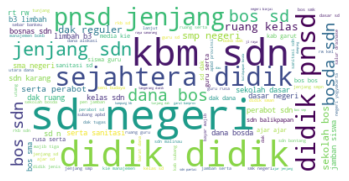

Cluster: 1


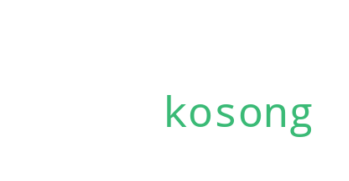

Cluster: 2


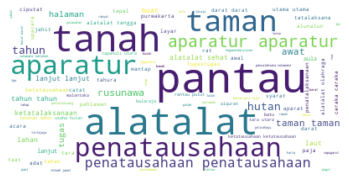

Cluster: 3


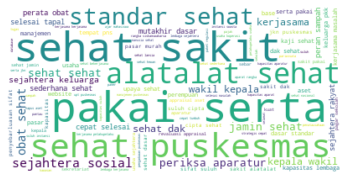

Cluster: 4


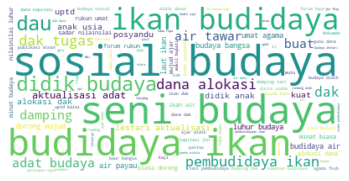

Cluster: 5


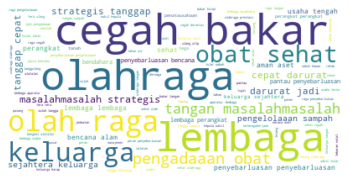

Cluster: 6


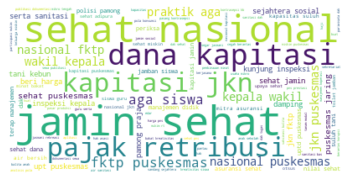

Cluster: 7


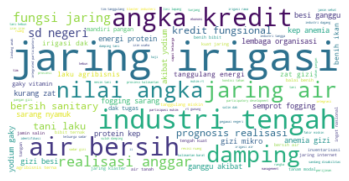

Cluster: 8


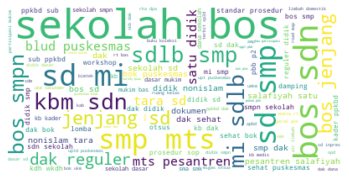

Cluster: 9


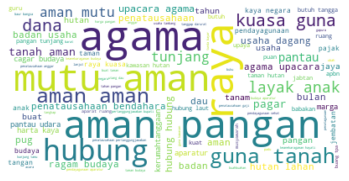

Cluster: 10


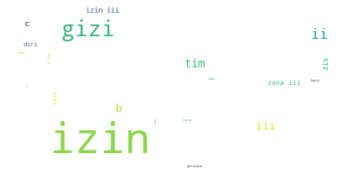

Cluster: 11


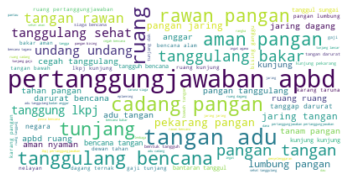

Cluster: 12


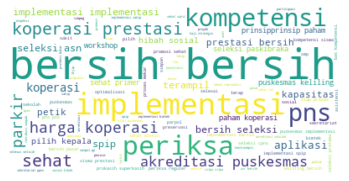

Cluster: 13


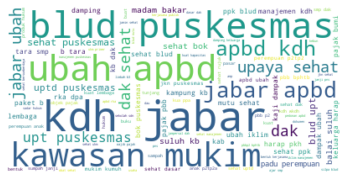

Cluster: 14


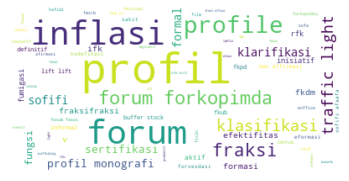

Cluster: 15


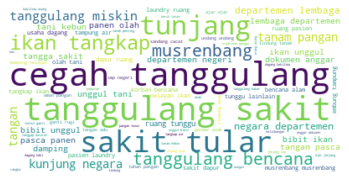

Cluster: 16


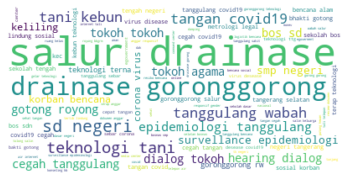

Cluster: 17


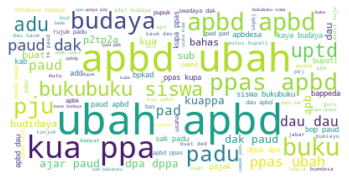

Cluster: 18


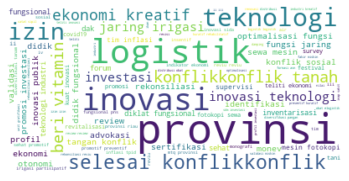

Cluster: 19


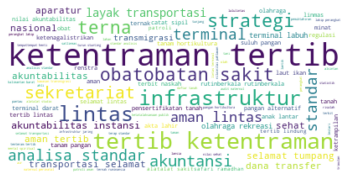

Cluster: 20


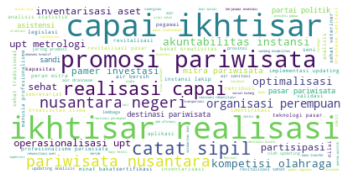

Cluster: 21


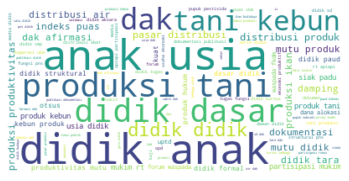

Cluster: 22


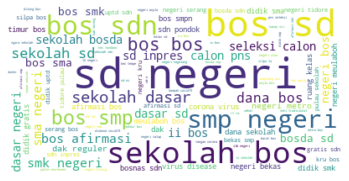

Cluster: 23


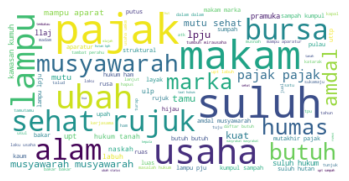

Cluster: 24


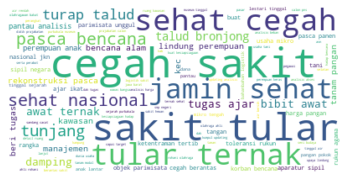

Cluster: 25


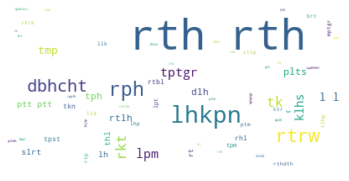

Cluster: 26


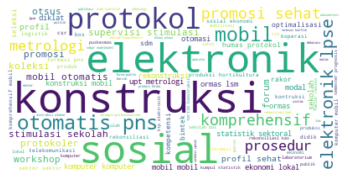

Cluster: 27


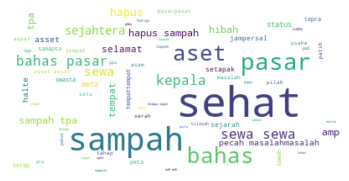

Cluster: 28


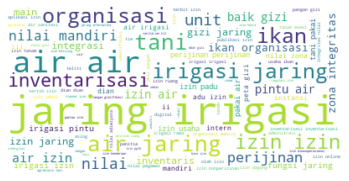

Cluster: 29


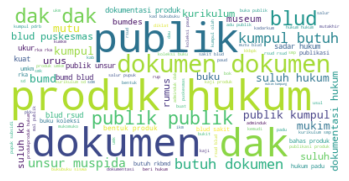

Cluster: 30


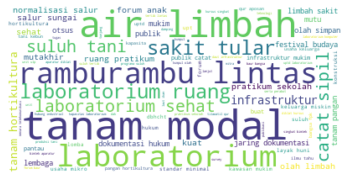

Cluster: 31


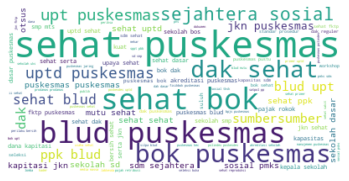

Cluster: 32


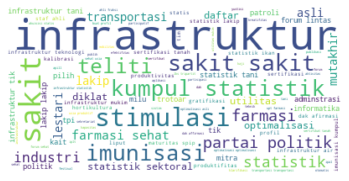

Cluster: 33


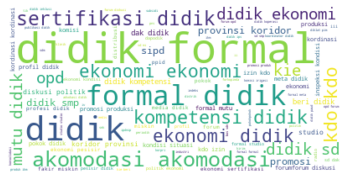

Cluster: 34


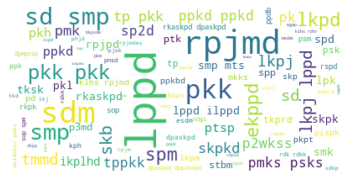

Cluster: 35


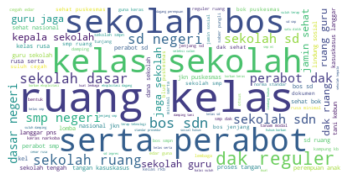

Cluster: 36


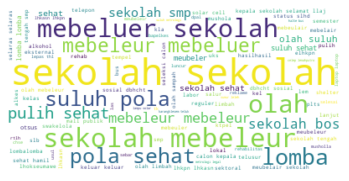

Cluster: 37


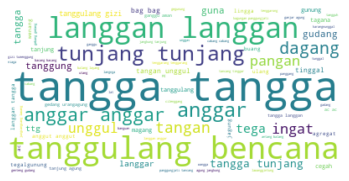

Cluster: 38


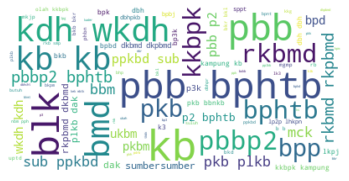

Cluster: 39


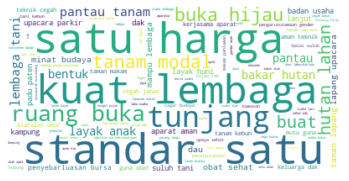

Cluster: 40


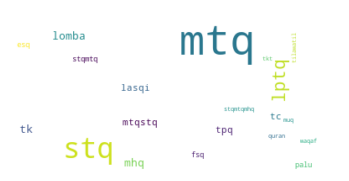

Cluster: 41


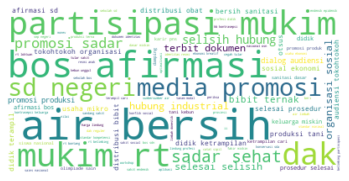

Cluster: 42


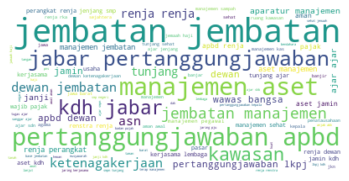

Cluster: 43


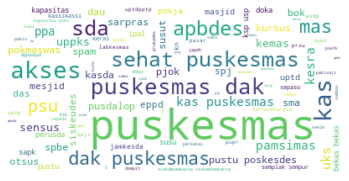

Cluster: 44


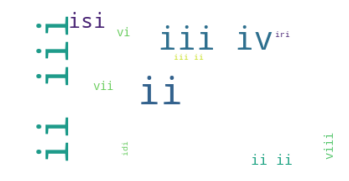

Cluster: 45


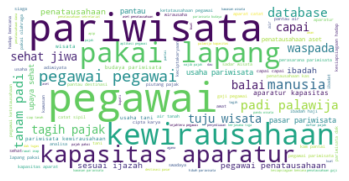

Cluster: 46


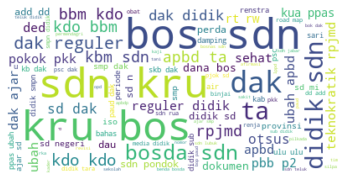

Cluster: 47


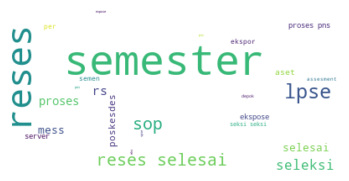

Cluster: 48


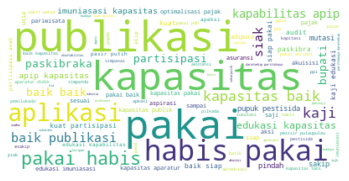

Cluster: 49


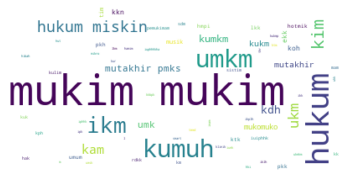

In [22]:
from wordcloud import WordCloud

result= results

for k in range(0,true_k):
   s=result[result.Cluster==k]
   text=s['Nama Kegiatan_stem'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   titles=results[results.Cluster==k]['Nama Kegiatan_stem']         
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [23]:
results.groupby(by='Cluster').sum()

Kode Pemda      Tahun  Nilai Anggaran
Cluster                                       
0         199477.33   27886100    9.962971e+12
1         849888.31  114990520    1.702396e+15
2          60802.50    8207260    3.446098e+12
3         246023.96   33515840    1.725426e+13
4         195237.31   27102340    7.935100e+12
5         179175.72   25151020    9.027545e+12
6         388542.11   53550200    2.044715e+13
7         281846.08   40696940    1.142075e+13
8         137402.60   19414220    2.149395e+13
9          86332.72   11877600    5.137546e+12
10         17336.92    2355320    6.290912e+11
11        163105.53   22428060    1.312601e+13
12        105173.82   14376340    5.504859e+12
13        204737.64   29063760    1.284605e+13
14         20478.47    2642160    3.837145e+11
15        301748.51   42658360    2.547153e+13
16        161383.31   23084560    9.135155e+12
17         64050.45    8677920    2.116320e+12
18        128047.56   17485120    4.084371e+12
19        149089.52   20218180    5.855357e+12
20        254348.92   34752080    7.425450e+12
21        193798.60   26150920    1.189160e+13
22        185805.62   25684300    8.433000e+12
23         69552.47    9582880    3.554339e+12
24        389747.63   55400520    1.680127e+13
25         12393.81    1848300    6.344860e+11
26        100465.55   13897600    3.136669e+12
27         79711.02   10962540    9.070589e+12
28         87703.77   12216960    8.971981e+12
29         95256.69   13156260    1.235471e+13
30        238594.03   32806820    8.427989e+12
31        219219.12   30726220    1.556673e+13
32         97544.26   13182520    8.840659e+12
33         99779.83   13968300    8.346284e+12
34         35067.35    4773260    6.120589e+12
35        321014.57   43785520    2.254540e+13
36         69438.22    9092020    7.632066e+12
37         39271.42    5726700    1.874078e+12
38         17428.33    2442180    4.367357e+11
39        288085.34   40729260    1.261726e+13
40          3236.27     440360    9.216939e+10
41        343949.39   46815520    1.561757e+13
42        104060.64   14798520    1.737590e+13
43         36896.35    4944960    4.592368e+12
44          3677.80     488840    7.668602e+11
45        111214.39   15081320    5.517310e+12
46         33484.55    4843960    1.477173e+12
47         26150.97    3353200    1.821192e+12
48         69912.83    9750540    2.885668e+12
49         14022.53    1927080    7.801915e+11

In [24]:
results['Label'] = results['Cluster']

In [25]:
results

Akun Analisis  \
0                                      NaN   
1                                  41. PAD   
2                                  41. PAD   
3                                  41. PAD   
4                                  41. PAD   
...                                    ...   
519159  66. Pengeluaran Pembiayaan Lainnya   
519160  66. Pengeluaran Pembiayaan Lainnya   
519161  66. Pengeluaran Pembiayaan Lainnya   
519162  66. Pengeluaran Pembiayaan Lainnya   
519163  66. Pengeluaran Pembiayaan Lainnya   

                                            Nama Kegiatan  \
0       perhitungan fihak ketiga badan pengelolaan keu...   
1                                                     non   
2                                                     non   
3                                                     non   
4                                                     non   
...                                                   ...   
519159                                                non   
519160                                                non   
519161                                                non   
519162                                                non   
519163                                                non   

                   Nama Kegiatan_stem  Kode Pemda     Standar Pemda  Tahun  \
0       hitung fihak tiga badan pajak       13.37     Kota Surabaya   2020   
1                              kosong        1.00     Provinsi Aceh   2020   
2                              kosong        1.00     Provinsi Aceh   2020   
3                              kosong        1.00     Provinsi Aceh   2020   
4                              kosong        1.00     Provinsi Aceh   2020   
...                               ...         ...               ...    ...   
519159                         kosong       24.21  Kab. Sabu Raijua   2020   
519160                         kosong       24.22       Kab. Malaka   2020   
519161                         kosong       26.00    Provinsi Papua   2020   
519162                         kosong       26.01  Kab. Biak Numfor   2020   
519163                         kosong       26.12       Kab. Keerom   2020   

        Nilai Anggaran  Cluster  Label  
0         2.221547e+11       24     24  
1         1.477991e+12        1      1  
2         8.159970e+09        1      1  
3         1.817008e+11        1      1  
4         9.029240e+11        1      1  
...                ...      ...    ...  
519159    4.518883e+09        1      1  
519160    1.008976e+10        1      1  
519161    8.733509e+10        1      1  
519162    9.357000e+08        1      1  
519163    3.498267e+06        1      1  

[519164 rows x 9 columns]

In [37]:
results['Label'] = results['Label'].replace([0], 'Pendidikan')
results['Label'] = results['Label'].replace([1], 'Lainnya')
results['Label'] = results['Label'].replace([2], 'Lainnya')
results['Label'] = results['Label'].replace([3], 'Kesehatan')
results['Label'] = results['Label'].replace([4], 'Pertanian')
results['Label'] = results['Label'].replace([5], 'Lainnya')
results['Label'] = results['Label'].replace([6], 'Kesehatan')
results['Label'] = results['Label'].replace([7], 'Pertanian')
results['Label'] = results['Label'].replace([8], 'Pendidikan')
results['Label'] = results['Label'].replace([9], 'Lainnya')
results['Label'] = results['Label'].replace([10], 'Lainnya')
results['Label'] = results['Label'].replace([11], 'Lainnya')
results['Label'] = results['Label'].replace([12], 'Lainnya')
results['Label'] = results['Label'].replace([13], 'Kesehatan')
results['Label'] = results['Label'].replace([14], 'Lainnya')
results['Label'] = results['Label'].replace([15], 'Pertanian')
results['Label'] = results['Label'].replace([16], 'Pertanian')
results['Label'] = results['Label'].replace([17], 'Lainnya')
results['Label'] = results['Label'].replace([18], 'Lainnya')
results['Label'] = results['Label'].replace([19], 'Lainnya')
results['Label'] = results['Label'].replace([20], 'Pariwisata')
results['Label'] = results['Label'].replace([21], 'Pertanian')
results['Label'] = results['Label'].replace([22], 'Pendidikan')
results['Label'] = results['Label'].replace([23], 'Lainnya')
results['Label'] = results['Label'].replace([24], 'Kesehatan')
results['Label'] = results['Label'].replace([25], 'Lainnya')
results['Label'] = results['Label'].replace([26], 'Lainnya')
results['Label'] = results['Label'].replace([27], 'Kesehatan')
results['Label'] = results['Label'].replace([28], 'Pertanian')
results['Label'] = results['Label'].replace([29], 'Lainnya')
results['Label'] = results['Label'].replace([30], 'Lainnya')
results['Label'] = results['Label'].replace([31], 'Kesehatan')
results['Label'] = results['Label'].replace([32], 'Lainnya')
results['Label'] = results['Label'].replace([33], 'Pendidikan')
results['Label'] = results['Label'].replace([34], 'Lainnya')
results['Label'] = results['Label'].replace([35], 'Pendidikan')
results['Label'] = results['Label'].replace([36], 'Pendidikan')
results['Label'] = results['Label'].replace([37], 'Lainnya')
results['Label'] = results['Label'].replace([38], 'Lainnya')
results['Label'] = results['Label'].replace([39], 'Lainnya')
results['Label'] = results['Label'].replace([40], 'Pendidikan')
results['Label'] = results['Label'].replace([41], 'Lainnya')
results['Label'] = results['Label'].replace([42], 'Lainnya')
results['Label'] = results['Label'].replace([43], 'Kesehatan')
results['Label'] = results['Label'].replace([44], 'Lainnya')
results['Label'] = results['Label'].replace([45], 'Pariwisata')
results['Label'] = results['Label'].replace([46], 'Lainnya')
results['Label'] = results['Label'].replace([47], 'Lainnya')
results['Label'] = results['Label'].replace([48], 'Lainnya')
results['Label'] = results['Label'].replace([49], 'UMKM')

In [38]:
results.groupby(by='Label').sum()

Kode Pemda      Tahun  Nilai Anggaran  Cluster
Label                                                     
Kesehatan   1564877.83  218164040    9.657841e+13  1777438
Lainnya     3398376.95  466605860    1.849649e+15  4738669
Pariwisata   365563.31   49833400    1.294276e+13   680050
Pendidikan  1016154.44  140270820    7.850584e+13  1514229
Pertanian   1221717.58  171910080    7.482612e+13  1135525
UMKM          14022.53    1927080    7.801915e+11    46746

In [39]:
results.to_excel('Data_Realisasi_2020.xlsx')